# Linear Model

```{attention}
- [ ] get the data from the instructions of the web page (use both stuff; API and CSV to learn how to do it)
- [ ] explore the metadata, interpret the info
- [ ] make a dataframe from the data
- [ ] clean-up: manage NaNs, get suitable categorical values when needed
- [ ] make a seaborn pairplot with the suitable hue
```

```{attention}
- [ ] Linear and affine prediction from weights only: do it with `torch.linalg.lstsq`, 
- [ ] scatter the results (`pairplot` or `scatter`)
- [ ] compute RMS error and associated relative error (as a %)
- [ ] Replace weight with its inverse (affine model), do it again.
- [ ] Use pytorch and SGD to get the same result ; find the "best" lr. This is a failure, investigate (theoretically)
- [ ] Improve the convergence with momentum
- [ ] Improve the convergence with rescaling (predict how well the algo is gonna do, then do it)
```

```{attention}
- [ ] Try power laws with weights?
- [ ] Improve with extra variables (ex: years ?)
- [ ] Try other, non-linear architectures (ex: nn) ; take care of over-learning!!!
```

ℹ️ Repository: [Auto MPG - UCI Machine Learning Repository]

ℹ️ Data URL: <https://archive.ics.uci.edu/static/public/9/data.csv>

🇺🇸 MPG means "Miles Per Gallon"

[Auto MPG - UCI Machine Learning Repository]: https://archive.ics.uci.edu/dataset/9/auto+mpg


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

## Dataset

### With `ucimlrepo` and `pandas`

In [46]:
import pandas as pd

In [47]:
from ucimlrepo import fetch_ucirepo 
auto_mpg = fetch_ucirepo(id=9) 

assert isinstance(auto_mpg, dict)
print(list(auto_mpg.keys()))

['data', 'metadata', 'variables']


In [48]:
metadata = auto_mpg["metadata"]
assert isinstance(metadata, dict)
metadata

{'uci_id': 9,
 'name': 'Auto MPG',
 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg',
 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv',
 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption',
 'area': 'Other',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 398,
 'num_features': 7,
 'feature_types': ['Real', 'Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['mpg'],
 'index_col': ['car_name'],
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1993,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5859H',
 'creators': ['R. Quinlan'],
 'intro_paper': None,
 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had 

In [49]:
variables = auto_mpg["variables"]
assert isinstance(variables, pd.DataFrame)
variables

,name,role,type,demographic,description,units,missing_values
0,displacement,Feature,Continuous,None,None,None,no
1,mpg,Target,Continuous,None,None,None,no
2,cylinders,Feature,Integer,None,None,None,no
3,horsepower,Feature,Continuous,None,None,None,yes
4,weight,Feature,Continuous,None,None,None,no
5,acceleration,Feature,Continuous,None,None,None,no
6,model_year,Feature,Integer,None,None,None,no
7,origin,Feature,Integer,None,None,None,no
8,car_name,ID,Categorical,None,None,None,no


In [50]:
data = auto_mpg["data"]

assert isinstance(data, dict)
list(data.keys())

['ids', 'features', 'targets', 'original', 'headers']

In [51]:
data["ids"]

,car_name
0,"chevrolet,chevelle,malibu"
1,"buick,skylark,320"
2,"plymouth,satellite"
3,"amc,rebel,sst"
4,"ford,torino"
...,...
393,"ford,mustang,gl"
394,"vw,pickup"
395,"dodge,rampage"
396,"ford,ranger"


In [52]:
X = data["features"]
assert isinstance(X, pd.DataFrame)
X

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


In [53]:
y = data["targets"]
assert isinstance(y, pd.DataFrame)
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


### From the CSV file (with pandas)

In [54]:
import csv

import pandas as pd
import requests

In [55]:
r = requests.get("https://archive.ics.uci.edu/static/public/9/data.csv")
for line in r.text.splitlines()[:10]:
    print(line)
print("...")
with open("data/auto_mpg.csv", mode="tw", encoding="utf-8") as file:
    file.write(r.text)

car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
"chevrolet,chevelle,malibu",8,307,130,3504,12,70,1,18
"buick,skylark,320",8,350,165,3693,11.5,70,1,15
"plymouth,satellite",8,318,150,3436,11,70,1,18
"amc,rebel,sst",8,304,150,3433,12,70,1,16
"ford,torino",8,302,140,3449,10.5,70,1,17
"ford,galaxie,500",8,429,198,4341,10,70,1,15
"chevrolet,impala",8,454,220,4354,9,70,1,14
"plymouth,fury,iii",8,440,215,4312,8.5,70,1,14
"pontiac,catalina",8,455,225,4425,10,70,1,14
...


In [56]:
df = pd.read_csv("data/auto_mpg.csv")
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0
394,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0
395,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0
396,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0


## Data Cleanup

In [57]:
df.isna().any()

car_name        False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
mpg             False
dtype: bool

In [58]:
df = df.dropna().reset_index(drop=True)
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...,...
387,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0
388,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0
389,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0
390,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0


In [59]:
df.isna().any()

car_name        False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
mpg             False
dtype: bool

In [60]:
set(df["origin"])

{1, 2, 3}

In [61]:
list(df[df["origin"] == 1]["car_name"].values)

['chevrolet,chevelle,malibu',
 'buick,skylark,320',
 'plymouth,satellite',
 'amc,rebel,sst',
 'ford,torino',
 'ford,galaxie,500',
 'chevrolet,impala',
 'plymouth,fury,iii',
 'pontiac,catalina',
 'amc,ambassador,dpl',
 'dodge,challenger,se',
 "plymouth,'cuda,340",
 'chevrolet,monte,carlo',
 'buick,estate,wagon,(sw)',
 'plymouth,duster',
 'amc,hornet',
 'ford,maverick',
 'amc,gremlin',
 'ford,f250',
 'chevy,c20',
 'dodge,d200',
 'hi,1200d',
 'chevrolet,vega,2300',
 'amc,gremlin',
 'plymouth,satellite,custom',
 'chevrolet,chevelle,malibu',
 'ford,torino,500',
 'amc,matador',
 'chevrolet,impala',
 'pontiac,catalina,brougham',
 'ford,galaxie,500',
 'plymouth,fury,iii',
 'dodge,monaco,(sw)',
 'ford,country,squire,(sw)',
 'pontiac,safari,(sw)',
 'amc,hornet,sportabout,(sw)',
 'chevrolet,vega,(sw)',
 'pontiac,firebird',
 'ford,mustang',
 'mercury,capri,2000',
 'plymouth,cricket',
 'dodge,colt,hardtop',
 'chevrolet,vega',
 'ford,pinto,runabout',
 'chevrolet,impala',
 'pontiac,catalina',
 'plymo

In [62]:
list(df[df["origin"] == 2]["car_name"].values)

['volkswagen,1131,deluxe,sedan',
 'peugeot,504',
 'audi,100,ls',
 'saab,99e',
 'bmw,2002',
 'opel,1900',
 'peugeot,304',
 'fiat,124b',
 'volkswagen,model,111',
 'volkswagen,type,3',
 'volvo,145e,(sw)',
 'volkswagen,411,(sw)',
 'peugeot,504,(sw)',
 'renault,12,(sw)',
 'volkswagen,super,beetle',
 'fiat,124,sport,coupe',
 'fiat,128',
 'opel,manta',
 'audi,100ls',
 'volvo,144ea',
 'saab,99le',
 'audi,fox',
 'volkswagen,dasher',
 'opel,manta',
 'fiat,128',
 'fiat,124,tc',
 'fiat,x1.9',
 'volkswagen,dasher',
 'volkswagen,rabbit',
 'audi,100ls',
 'peugeot,504',
 'volvo,244dl',
 'saab,99le',
 'fiat,131',
 'opel,1900',
 'renault,12tl',
 'vw,rabbit',
 'volkswagen,rabbit',
 'volvo,245',
 'peugeot,504',
 'mercedes-benz,280s',
 'renault,5,gtl',
 'volkswagen,rabbit,custom',
 'volkswagen,dasher',
 'bmw,320i',
 'volkswagen,rabbit,custom,diesel',
 'audi,5000',
 'volvo,264gl',
 'saab,99gle',
 'peugeot,604sl',
 'volkswagen,scirocco',
 'vw,rabbit,custom',
 'mercedes,benz,300d',
 'peugeot,504',
 'fiat,stra

In [63]:
list(df[df["origin"] == 3]["car_name"].values)

['toyota,corona,mark,ii',
 'datsun,pl510',
 'datsun,pl510',
 'toyota,corona',
 'toyota,corolla,1200',
 'datsun,1200',
 'toyota,corona,hardtop',
 'mazda,rx2,coupe',
 'datsun,510,(sw)',
 'toyouta,corona,mark,ii,(sw)',
 'toyota,corolla,1600,(sw)',
 'toyota,carina',
 'datsun,610',
 'maxda,rx3',
 'toyota,mark,ii',
 'datsun,b210',
 'toyota,corolla,1200',
 'toyota,corona',
 'datsun,710',
 'honda,civic',
 'subaru',
 'toyota,corolla',
 'toyota,corona',
 'datsun,710',
 'honda,civic,cvcc',
 'honda,civic',
 'datsun,b-210',
 'toyota,corolla',
 'toyota,mark,ii',
 'honda,accord,cvcc',
 'datsun,f-10,hatchback',
 'toyota,corolla,liftback',
 'subaru,dl',
 'datsun,810',
 'mazda,rx-4',
 'mazda,glc,deluxe',
 'datsun,b210,gx',
 'honda,civic,cvcc',
 'toyota,corona',
 'datsun,510',
 'toyota,celica,gt,liftback',
 'datsun,200-sx',
 'honda,accord,lx',
 'maxda,glc,deluxe',
 'datsun,210',
 'toyota,corolla,tercel',
 'datsun,310',
 'toyota,corona,liftback',
 'mazda,626',
 'datsun,510,hatchback',
 'toyota,corolla',
 

In [64]:
def region(i):
    if i == 1:
        return "USA"
    elif i == 2:
        return "Europe"
    elif i == 3:
        return "Asia"
df["origin"] = df["origin"].transform(region)
df
df_full = df

In [21]:
import seaborn as sns

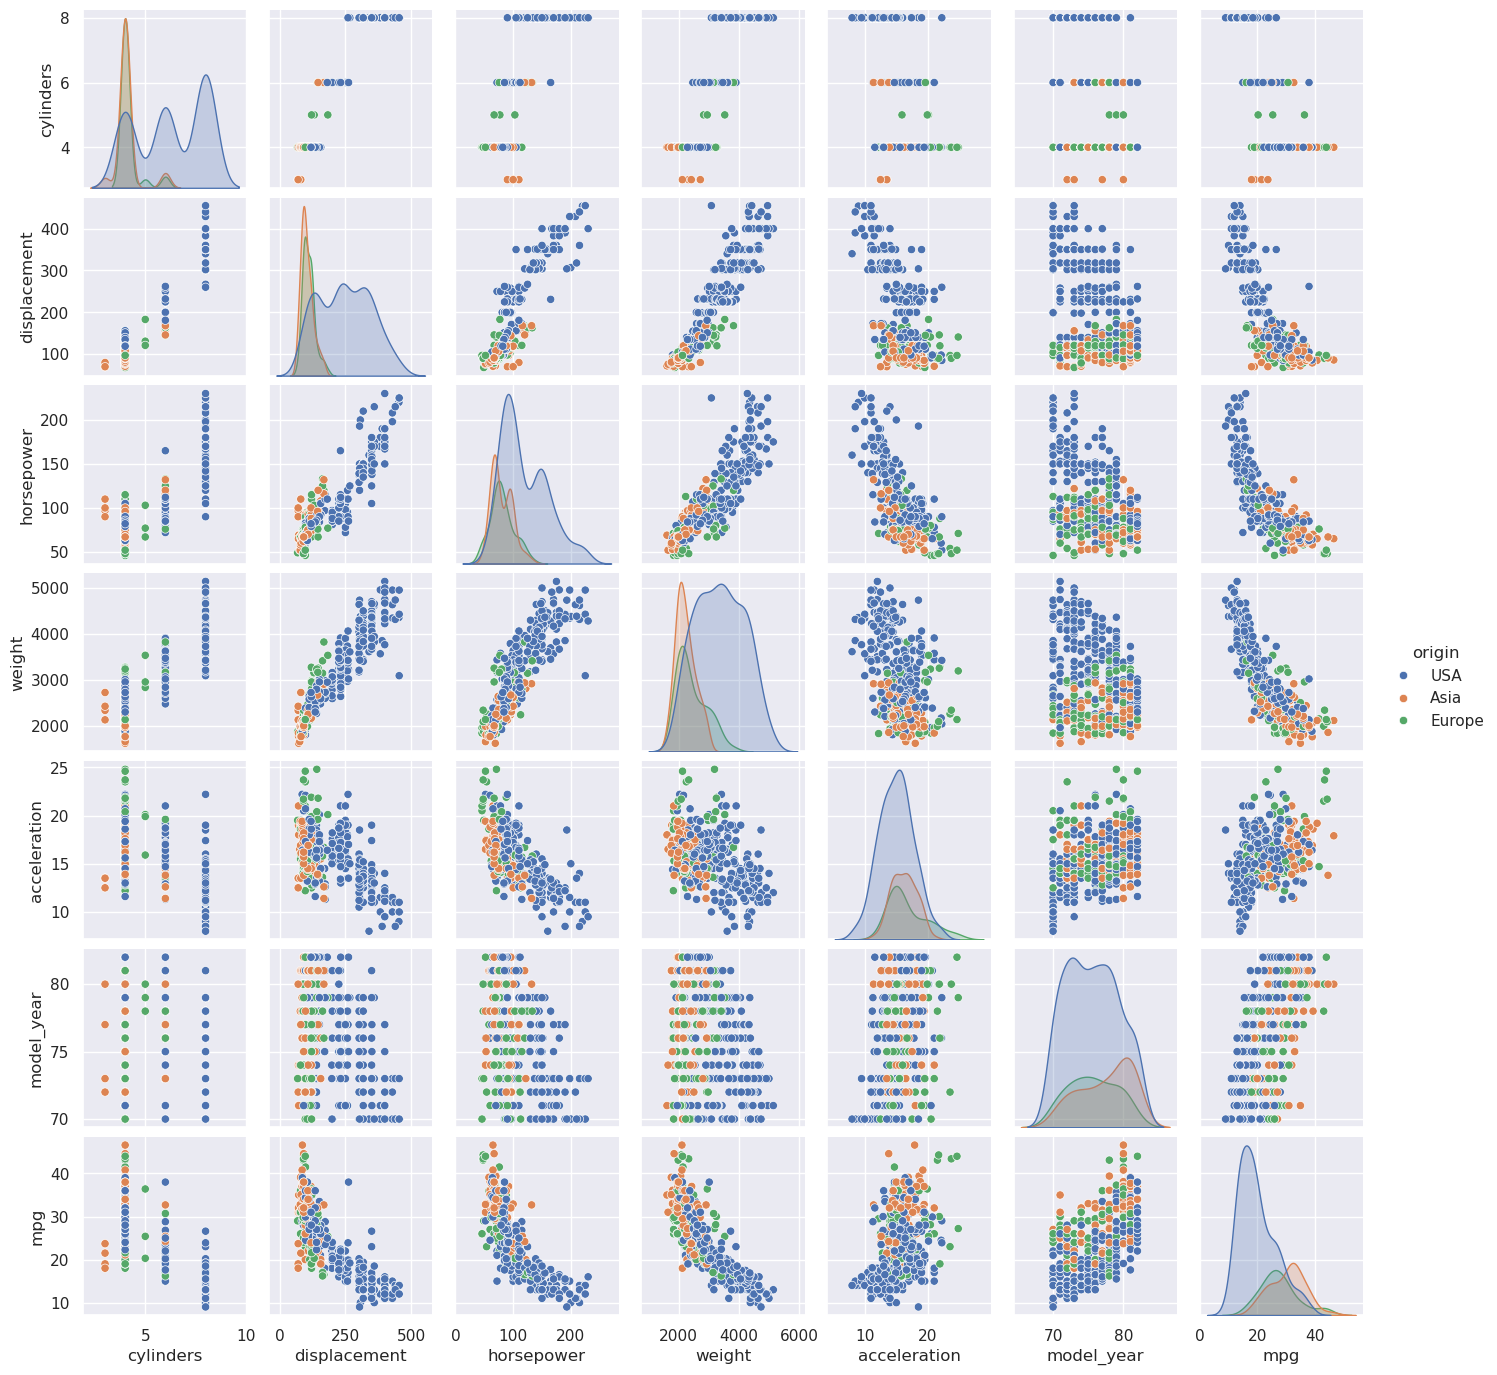

In [22]:
#scatterplot
sns.pairplot(df, height=2.0, hue="origin")
None

## Torch

In [23]:
import torch
import torch.linalg

m, _ = df.shape
m

### Single Predictor

In [24]:
weight = torch.tensor(df["weight"].values).type(torch.float64)
mpg = torch.tensor(df["mpg"].values)
weight.shape, mpg.shape

(torch.Size([392]), torch.Size([392]))

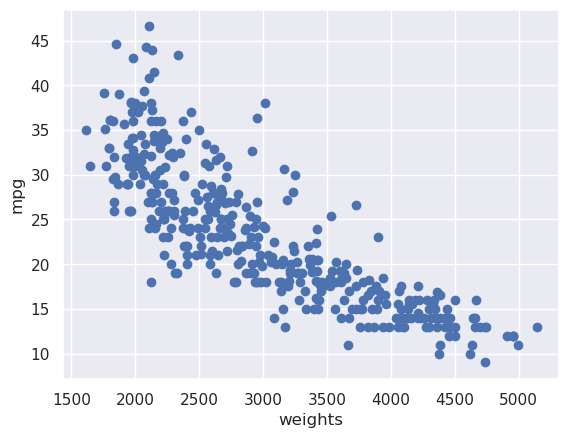

In [25]:
plt.scatter(weight, mpg)
plt.xlabel("weights")
plt.ylabel("mpg")
None

In [26]:
result = torch.linalg.lstsq(weight.reshape(-1, 1), mpg)

In [27]:
result

torch.return_types.linalg_lstsq(
solution=tensor([0.0067], dtype=torch.float64),
residuals=tensor([], dtype=torch.float64),
rank=tensor(1),
singular_values=tensor([], dtype=torch.float64))

In [28]:
alpha = result.solution.item()
alpha

0.006708863594037563

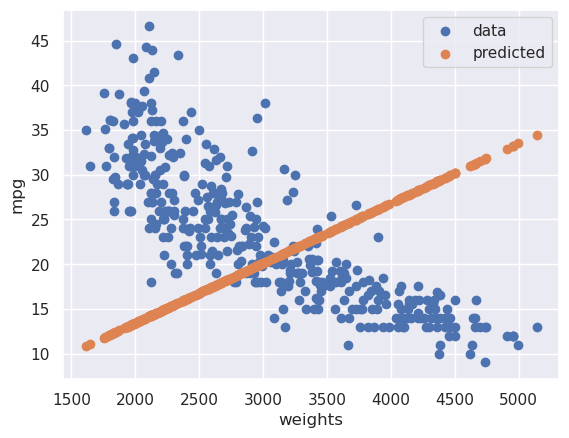

In [29]:
plt.scatter(weight, mpg, label="data")
plt.scatter(weight, alpha*weight, label="predicted")
plt.xlabel("weights")
plt.ylabel("mpg")
plt.legend()
None

In [30]:
mean_error = ((mpg - alpha * weight)**2).mean().sqrt().item()
mean_error

13.380383308555983

In [31]:
relative_error = mean_error / (mpg**2).mean().sqrt().item()
relative_error
print(f"Relative error: {relative_error*100:.1f}%")

Relative error: 54.2%


In [32]:
offset = torch.ones_like(weight)

In [33]:
results = torch.linalg.lstsq(torch.stack((weight, offset), 1), mpg)
results

torch.return_types.linalg_lstsq(
solution=tensor([-7.6473e-03,  4.6217e+01], dtype=torch.float64),
residuals=tensor([], dtype=torch.float64),
rank=tensor(2),
singular_values=tensor([], dtype=torch.float64))

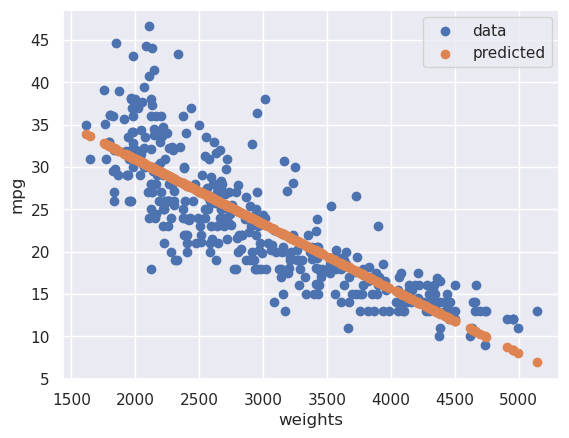

In [34]:
alpha = results.solution
plt.scatter(weight, mpg, label="data")
plt.scatter(weight, alpha[0]*weight + alpha[1], label="predicted")
plt.xlabel("weights")
plt.ylabel("mpg")
plt.legend()
None

In [35]:
mpg_pred = alpha[0] * weight + alpha[1]
mean_error = ((mpg - mpg_pred)**2).mean().sqrt().item()
relative_error = mean_error / (mpg**2).mean().sqrt().item()
relative_error
print(f"Relative error: {relative_error*100:.1f}%")

Relative error: 17.5%


In [36]:
df = pd.DataFrame()
df["mpg"] = mpg
df["mpg_pred"] = mpg_pred
df

,mpg,mpg_pred
0,18.0,19.420236
1,15.0,17.974889
2,18.0,19.940256
3,16.0,19.963198
4,17.0,19.840840
...,...,...
387,27.0,24.880439
388,44.0,29.927685
389,32.0,28.665873
390,28.0,26.142250


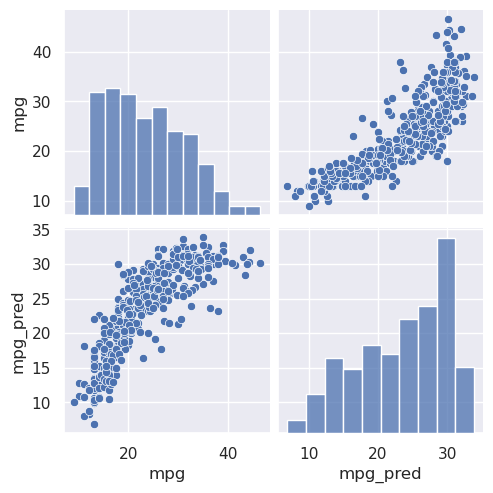

In [37]:
sns.pairplot(df)

In [38]:
inv_weight = 1.0 / weight
A = torch.stack((inv_weight, offset), dim=1)
result = torch.linalg.lstsq(A, mpg)
result

torch.return_types.linalg_lstsq(
solution=tensor([ 6.5953e+04, -5.0826e-01], dtype=torch.float64),
residuals=tensor([], dtype=torch.float64),
rank=tensor(2),
singular_values=tensor([], dtype=torch.float64))

In [39]:
alpha = result.solution
mpg_pred = alpha[0] * inv_weight + alpha[1]

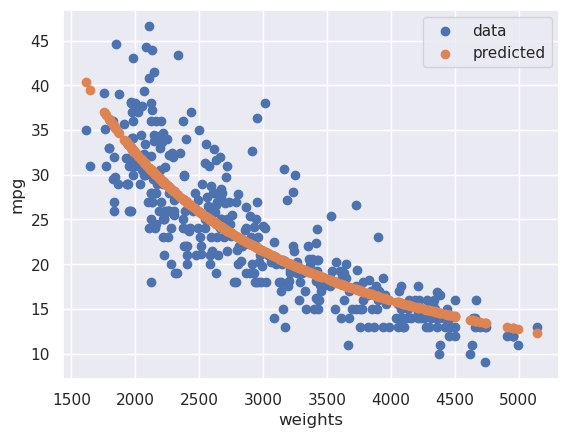

In [40]:
plt.scatter(weight, mpg, label="data")
plt.scatter(weight, mpg_pred, label="predicted")
plt.xlabel("weights")
plt.ylabel("mpg")
plt.legend()
None

In [41]:
mean_error = ((mpg - mpg_pred)**2).mean().sqrt().item()
print(mean_error)
relative_error = mean_error / (mpg**2).mean().sqrt().item()
relative_error
print(f"Relative error: {relative_error*100:.1f}%")

4.2212510200336375
Relative error: 17.1%


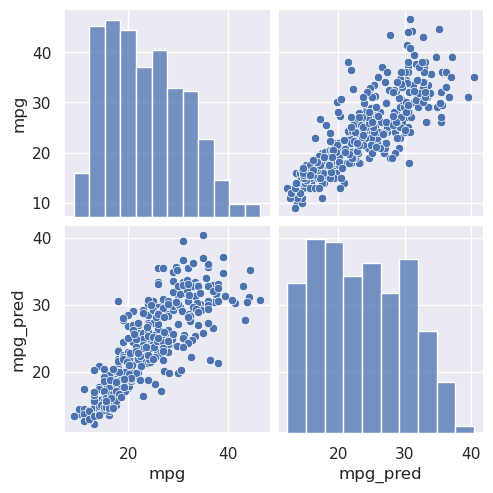

In [42]:
df = pd.DataFrame()
df["mpg"] = mpg
df["mpg_pred"] = mpg_pred
sns.pairplot(df)

In [43]:
inv_weight = 1.0 / weight
A = torch.stack((weight, inv_weight, offset), dim=1)
result = torch.linalg.lstsq(A, mpg)
result

torch.return_types.linalg_lstsq(
solution=tensor([-2.7560e-03,  4.3214e+04,  1.5957e+01], dtype=torch.float64),
residuals=tensor([], dtype=torch.float64),
rank=tensor(3),
singular_values=tensor([], dtype=torch.float64))

In [44]:
alpha = result.solution
mpg_pred = alpha[0] * weight + alpha[1] * inv_weight + alpha[2]

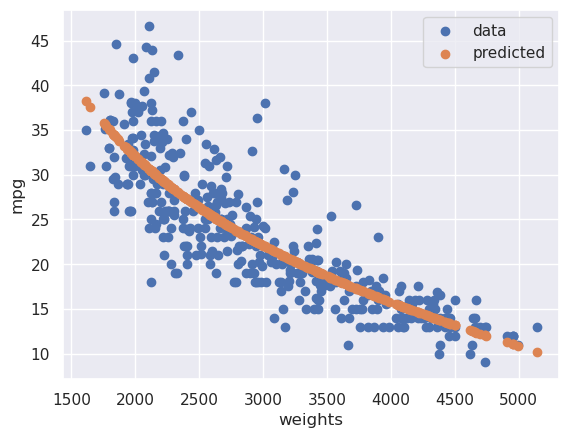

In [45]:
plt.scatter(weight, mpg, label="data")
plt.scatter(weight, mpg_pred, label="predicted")
plt.xlabel("weights")
plt.ylabel("mpg")
plt.legend()
None

In [46]:
mean_error = ((mpg - mpg_pred)**2).mean().sqrt().item()
relative_error = mean_error / (mpg**2).mean().sqrt().item()
relative_error
print(f"Relative error: {relative_error*100:.1f}%")

Relative error: 16.9%


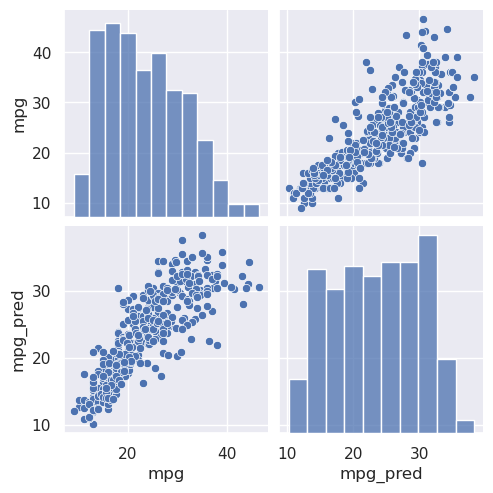

In [47]:
df = pd.DataFrame()
df["mpg"] = mpg
df["mpg_pred"] = mpg_pred
sns.pairplot(df)


In [48]:
clip_weight = torch.clip(weight-3000, min=0)
A = torch.stack((weight, clip_weight, offset), dim=1)
result = torch.linalg.lstsq(A, mpg)
result

torch.return_types.linalg_lstsq(
solution=tensor([-1.0754e-02,  5.3679e-03,  5.3580e+01], dtype=torch.float64),
residuals=tensor([], dtype=torch.float64),
rank=tensor(3),
singular_values=tensor([], dtype=torch.float64))

In [49]:
alpha = result.solution
mpg_pred = alpha[0] * weight + alpha[1] * clip_weight + alpha[2]

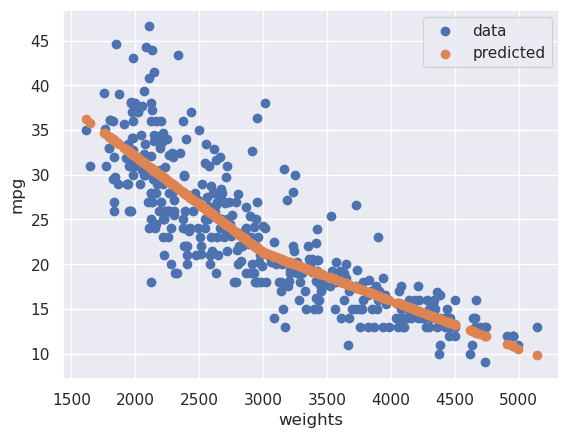

In [50]:
plt.scatter(weight, mpg, label="data")
plt.scatter(weight, mpg_pred, label="predicted")
plt.xlabel("weights")
plt.ylabel("mpg")
plt.legend()
None

In [51]:
mean_error = ((mpg - mpg_pred)**2).mean().sqrt().item()
relative_error = mean_error / (mpg**2).mean().sqrt().item()
relative_error
print(f"Relative error: {relative_error*100:.1f}%")

Relative error: 16.9%


In [52]:
df = pd.DataFrame()
df["mpg"] = mpg
df["mpg_pred"] = mpg_pred
inv_weight = 1.0 / weight
A = torch.stack((weight, inv_weight, offset), dim=1)
result = torch.linalg.lstsq(A, mpg)
result

torch.return_types.linalg_lstsq(
solution=tensor([-2.7560e-03,  4.3214e+04,  1.5957e+01], dtype=torch.float64),
residuals=tensor([], dtype=torch.float64),
rank=tensor(3),
singular_values=tensor([], dtype=torch.float64))

In [53]:
mean_error = ((mpg - mpg_pred)**2).mean().sqrt().item()
relative_error = mean_error / (mpg**2).mean().sqrt().item()
relative_error
print(f"Relative error: {relative_error*100:.1f}%")

Relative error: 16.9%


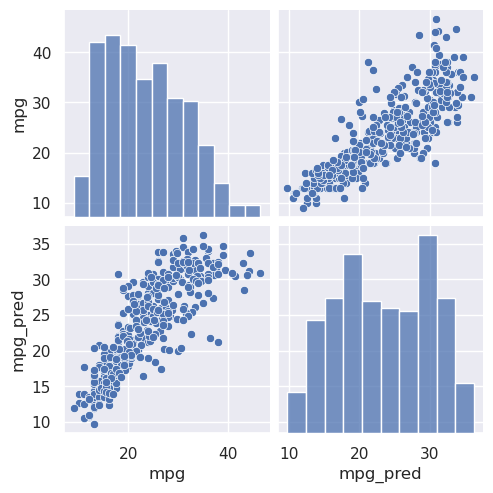

In [54]:
df = pd.DataFrame()
df["mpg"] = mpg
df["mpg_pred"] = mpg_pred
sns.pairplot(df)

### Incremental Solution with PyTorch

In [88]:
alpha = torch.tensor([ 0.0, 0.0 ], dtype=torch.float64, requires_grad=True)

In [112]:
inv_weight = 1.0 / weight
A = torch.stack((inv_weight, offset), dim=1)

def loss(alpha):
    mpg_pred  = torch.tensordot(A, alpha, dims=1)
    delta = mpg - mpg_pred
    return (delta**2).mean()

lr = 0.5
optimizer = torch.optim.SGD(params=[alpha], lr = lr)
for i in range(1_000_000):
    e2 = loss(alpha)
    if i < 100 or i % 100_000 == 0:
        mpg_pred = A @ alpha
        #mean_error = ((mpg - mpg_pred)**2).mean().sqrt().item()
        mean_error = e2.sqrt().item()
        relative_error = mean_error / (mpg**2).mean().sqrt().item()
        relative_error
        print(f"{i} {alpha.detach()} {relative_error*100:.1f}%")
    e2.backward()
    optimizer.step()
    optimizer.zero_grad()
    


0 tensor([1927.2637,   22.7459], dtype=torch.float64) 30.9%
1 tensor([1927.2643,   22.7459], dtype=torch.float64) 30.9%
2 tensor([1927.2649,   22.7459], dtype=torch.float64) 30.9%
3 tensor([1927.2656,   22.7459], dtype=torch.float64) 30.9%
4 tensor([1927.2662,   22.7459], dtype=torch.float64) 30.9%
5 tensor([1927.2668,   22.7459], dtype=torch.float64) 30.9%
6 tensor([1927.2675,   22.7459], dtype=torch.float64) 30.9%
7 tensor([1927.2681,   22.7459], dtype=torch.float64) 30.9%
8 tensor([1927.2687,   22.7459], dtype=torch.float64) 30.9%
9 tensor([1927.2694,   22.7459], dtype=torch.float64) 30.9%
10 tensor([1927.2700,   22.7459], dtype=torch.float64) 30.9%
11 tensor([1927.2706,   22.7459], dtype=torch.float64) 30.9%
12 tensor([1927.2713,   22.7459], dtype=torch.float64) 30.9%
13 tensor([1927.2719,   22.7459], dtype=torch.float64) 30.9%
14 tensor([1927.2725,   22.7459], dtype=torch.float64) 30.9%
15 tensor([1927.2732,   22.7459], dtype=torch.float64) 30.9%
16 tensor([1927.2738,   22.7459], 

In [90]:
alpha

tensor([ 1.3107, 23.4454], dtype=torch.float64, requires_grad=True)

In [102]:
n = len(weight)
print(n)
S = A.T @ A / n
S

392


tensor([[1.4179e-07, 3.6320e-04],
        [3.6320e-04, 1.0000e+00]], dtype=torch.float64)

In [103]:
eigv, _ = torch.linalg.eigh(S)
eigv

tensor([9.8725e-09, 1.0000e+00], dtype=torch.float64)

In [106]:
lr = 1.0 / (2.0 * eigv[1])
lr # reasonable choice

tensor(0.5000, dtype=torch.float64)

In [107]:
cond = torch.linalg.cond(S).item()
cond

101291628.21337372

In [108]:
factor = (1 - 1 / cond)
print(factor)
torch.log(torch.tensor(factor))

0.9999999901275158


tensor(0.)

In [109]:
torch.tensor(2.0).log()

tensor(0.6931)

$$
\left(1 - \frac{1}{\kappa}\right)^n \leq \frac{1}{2}
$$
is equivalent to
$$
n \geq -\frac{\log 2}{\log\left(1 - \frac{1}{\kappa}\right)} \approx \kappa \log 2
$$

In [85]:
-torch.tensor(2.0, dtype=torch.float64).log() /  torch.log(torch.tensor(1 - 1/cond, dtype=torch.float64))

tensor(70210006.4845, dtype=torch.float64)

In [83]:
cond * torch.tensor(2.0).log()

tensor(70210008.)

In [ ]:
cond * torch.tensor(2)

#### Try Some momentum

In [122]:
alpha = torch.tensor([ 0.0, 0.0 ], dtype=torch.float64, requires_grad=True)

In [123]:
inv_weight = 1.0 / weight
A = torch.stack((inv_weight, offset), dim=1)

def loss(alpha):
    mpg_pred  = torch.tensordot(A, alpha, dims=1)
    delta = mpg - mpg_pred
    return (delta**2).mean()

lr = 0.5
momentum = 0.999
optimizer = torch.optim.SGD(params=[alpha], lr=lr, momentum=momentum)
for i in range(1_000_000):
    e2 = loss(alpha)
    if i < 100 or i % 100_000 == 0:
        mpg_pred = A @ alpha
        #mean_error = ((mpg - mpg_pred)**2).mean().sqrt().item()
        mean_error = e2.sqrt().item()
        relative_error = mean_error / (mpg**2).mean().sqrt().item()
        relative_error
        print(f"{i} {alpha.detach()} {relative_error*100:.1f}%")
    e2.backward()
    optimizer.step()
    optimizer.zero_grad()

0 tensor([0., 0.], dtype=torch.float64) 100.0%
1 tensor([9.1667e-03, 2.3446e+01], dtype=torch.float64) 31.5%
2 tensor([1.8975e-02, 4.6868e+01], dtype=torch.float64) 99.9%
3 tensor([2.0918e-02, 4.6845e+01], dtype=torch.float64) 99.8%
4 tensor([1.5012e-02, 2.3423e+01], dtype=torch.float64) 31.5%
5 tensor([0.0098, 0.0469], dtype=torch.float64) 99.8%
6 tensor([0.0137, 0.0937], dtype=torch.float64) 99.6%
7 tensor([ 0.0267, 23.4927], dtype=torch.float64) 31.5%
8 tensor([4.0391e-02, 4.6821e+01], dtype=torch.float64) 99.7%
9 tensor([4.6203e-02, 4.6751e+01], dtype=torch.float64) 99.5%
10 tensor([ 0.0442, 23.3759], dtype=torch.float64) 31.6%
11 tensor([0.0429, 0.0938], dtype=torch.float64) 99.6%
12 tensor([0.0507, 0.1870], dtype=torch.float64) 99.3%
13 tensor([ 0.0676, 23.5391], dtype=torch.float64) 31.6%
14 tensor([ 0.0851, 46.7746], dtype=torch.float64) 99.5%
15 tensor([ 0.0947, 46.6581], dtype=torch.float64) 99.1%
16 tensor([ 0.0966, 23.3296], dtype=torch.float64) 31.6%
17 tensor([0.0991, 0.1

#### Rescale the data to improve the conditioning

In [73]:
df = df_full.copy()
mpg = df["mpg"]
weight = df["weight"]

In [74]:
df = pd.DataFrame()

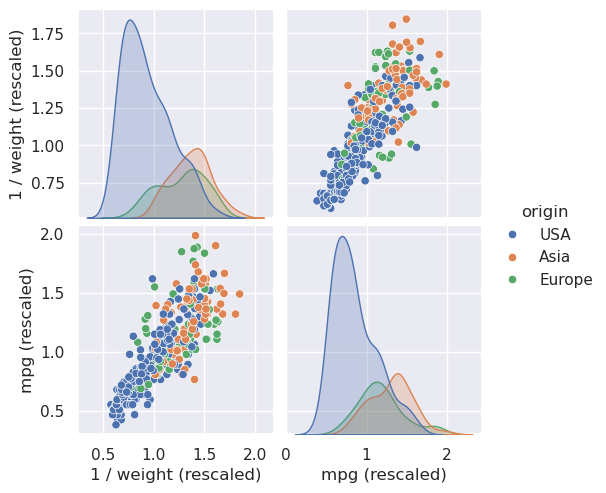

In [75]:
df["1 / weight (rescaled)"] = weight.mean() / weight
df["origin"] = df_full["origin"]
df["mpg (rescaled)"] = mpg / mpg.mean()
sns.pairplot(df, hue="origin")
None

In [83]:
A = torch.stack(
    (
        torch.tensor(
            df["1 / weight (rescaled)"].values
        ),  
        torch.ones(
            len(df), 
            dtype=torch.float64
        )
    ),
    dim = 1
)
#A

tensor([[0.8498, 1.0000],
        [0.8063, 1.0000],
        [0.8666, 1.0000],
        [0.8673, 1.0000],
        [0.8633, 1.0000],
        [0.6859, 1.0000],
        [0.6839, 1.0000],
        [0.6905, 1.0000],
        [0.6729, 1.0000],
        [0.7734, 1.0000],
        [0.8357, 1.0000],
        [0.8250, 1.0000],
        [0.7917, 1.0000],
        [0.9649, 1.0000],
        [1.2553, 1.0000],
        [1.0510, 1.0000],
        [1.0734, 1.0000],
        [1.1510, 1.0000],
        [1.3979, 1.0000],
        [1.6227, 1.0000],
        [1.1144, 1.0000],
        [1.2253, 1.0000],
        [1.2537, 1.0000],
        [1.3328, 1.0000],
        [1.1245, 1.0000],
        [0.6452, 1.0000],
        [0.6804, 1.0000],
        [0.6795, 1.0000],
        [0.6292, 1.0000],
        [1.3979, 1.0000],
        [1.3152, 1.0000],
        [1.3364, 1.0000],
        [1.1304, 1.0000],
        [0.8658, 1.0000],
        [0.8944, 1.0000],
        [0.9018, 1.0000],
        [0.9056, 1.0000],
        [0.7074, 1.0000],
        [0.6

In [85]:
S = A.T @ A / len(df)
torch.linalg.cond(S).item()

56.18408077299344

In [86]:
ev, _ = torch.linalg.eigh(S)
ev

tensor([0.0395, 2.2176], dtype=torch.float64)

In [87]:
lr = 0.5 / ev[1].item()
lr

0.22546858245142223

In [111]:
alpha_scaled = torch.tensor([ 0.0, 0.0 ], dtype=torch.float64, requires_grad=True)

In [114]:
mpg_rescaled = torch.tensor(df["mpg (rescaled)"], dtype=torch.float64)

def loss(alpha_scaled):
    mpg_rescaled_pred  = torch.tensordot(A, alpha_scaled, dims=1)
    delta = mpg_rescaled - mpg_rescaled_pred
    return (delta**2).mean()

lr = 0.2
optimizer = torch.optim.SGD(params=[alpha_scaled], lr = lr)
for i in range(100_000):
    e2 = loss(alpha_scaled)
    if i < 100 or i % 100_000 == 0:
        mpg_pred = A @ alpha_scaled
        #mean_error = ((mpg - mpg_pred)**2).mean().sqrt().item()
        mean_error = e2.sqrt().item()
        relative_error = mean_error / (mpg_rescaled**2).mean().sqrt().item()
        relative_error
        print(f"{i} {alpha_scaled.detach()} {relative_error*100:.1f}%")
    e2.backward()
    optimizer.step()
    optimizer.zero_grad()
print(f"{i} {alpha.detach()} {relative_error*100:.1f}%")

0 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
1 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
2 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
3 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
4 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
5 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
6 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
7 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
8 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
9 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
10 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
11 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
12 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
13 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
14 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
15 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
16 tensor([ 0.9447, -0.0217], dtype=torch.float64) 17.1%
17 tensor([ 0.9447, -0.0217], dtype=torch

In [122]:
print(alpha_scaled)
alpha = alpha_scaled.detach().clone() * torch.tensor(df_full["mpg"].mean())
print(alpha)
alpha[0] *= weight.mean()
alpha

tensor([ 0.9447, -0.0217], dtype=torch.float64, requires_grad=True)
tensor([22.1500, -0.5083], dtype=torch.float64)


tensor([ 6.5953e+04, -5.0826e-01], dtype=torch.float64)

#### Contour

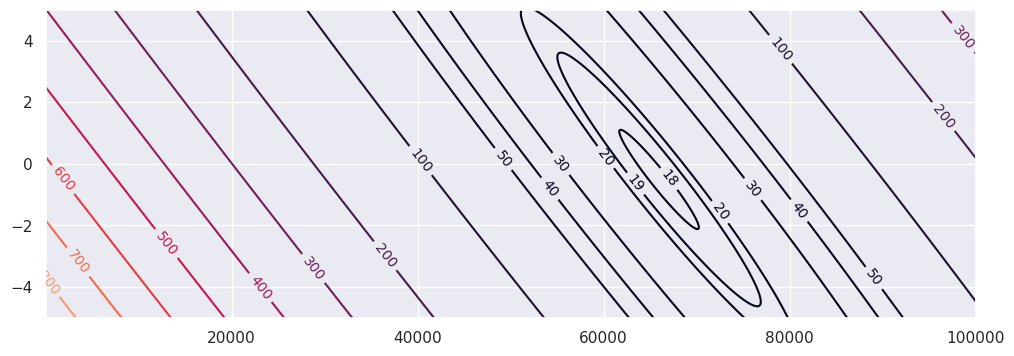

In [58]:
def e2(alphas):
    mpg_pred = torch.einsum("ij,...j->...i", A, alphas)
    return ((mpg_pred - mpg)**2).mean(dim=-1)

alpha_0 = torch.linspace(0.01, 100_000, 1000, dtype=torch.float64)
alpha_1 = torch.linspace(-5.0, 5.0, 1000, dtype=torch.float64)
Alpha_0, Alpha_1 = torch.meshgrid(alpha_0, alpha_1, indexing="ij")

Alpha = torch.stack((Alpha_0, Alpha_1), dim=2)
plt.figure(figsize=(12.0, 4.0))
cs = plt.contour(Alpha_0, Alpha_1, e2(Alpha), levels = [17, 18, 19, 20, 30, 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
plt.clabel(cs, inline=1, fontsize=10)
None

In [59]:
with torch.no_grad():
    mpg_pred = alpha[0].item() * inv_weight + alpha[1].item()

In [60]:
mean_error = ((mpg - mpg_pred)**2).mean().sqrt().item()
relative_error = mean_error / (mpg**2).mean().sqrt().item()
relative_error
print(f"Relative error: {relative_error*100:.1f}%")

Relative error: 31.3%


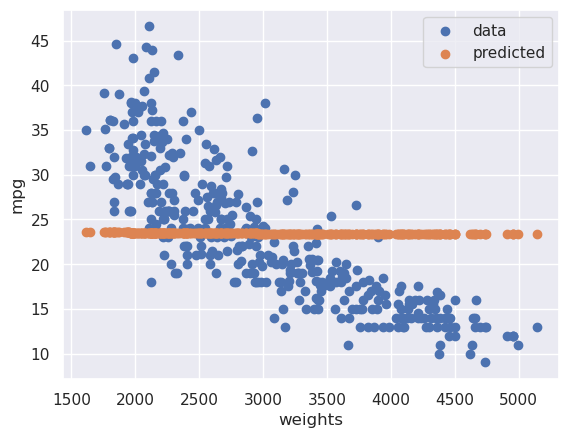

In [61]:
plt.scatter(weight, mpg, label="data")
plt.scatter(weight, mpg_pred.detach(), label="predicted")
plt.xlabel("weights")
plt.ylabel("mpg")
plt.legend()
None

#### Power Laws

Match 
$$
\mathrm{mpg} = a \mathrm{weight}^{b}
$$
directly or using the linear match
$$
\log \mathrm{mpg} = \log a + b \log(\mathrm{weight})
$$

```{warning}
The results will be different since the loss is not the same value in these two approaches.
```

In [28]:
df = df_full[["mpg"]]
df

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
387,27.0
388,44.0
389,32.0
390,28.0


### Multiple Predictors

In [30]:
keys = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]
df = df_full.copy()
df[keys]

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
387,4,140.0,86.0,2790,15.6,82
388,4,97.0,52.0,2130,24.6,82
389,4,135.0,84.0,2295,11.6,82
390,4,120.0,79.0,2625,18.6,82


In [ ]:
X_1 = torch.tensor(df[keys].values)
X_1

In [ ]:
# Deal with origin with one-hot encoding
USA = torch.tensor((df["origin"] == "USA").values).reshape((m, 1))
Europe = torch.tensor((df["origin"] == "Europe").values).reshape((m, 1))
Asia = torch.tensor((df["origin"] == "Asia").values).reshape((m, 1))
X_2 = torch.cat([USA, Europe, Asia], 1)
X_2

In [ ]:
X_3 = torch.ones((m, 1), dtype=torch.float64)
X_3

In [ ]:
m, n = X.shape
X = torch.cat((X_1, X_2, X_3), 1)
X

In [ ]:
y = torch.tensor(df["mpg"].values)
y

In [ ]:
r = torch.linalg.lstsq(X, y)

In [ ]:
A = r.solution
A

In [ ]:
y_hat = torch.tensordot(X, A, dims=1)
e = y - y_hat

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(y, label="MPG value")
plt.hist(y_hat, label="predicted MPG value")
plt.legend()
None

In [ ]:
e = y - y_hat

If $\mu$ denotes the mean of $e$ 
$$
\mu = \frac{1}{n} \sum_{k=1}^n e_k
$$
and $\sigma$ its (biased, uncorrected) standard deviation
$$
\sigma = \sqrt{\frac{1}{n}\sum_{k=1}^n (e_k - \mu)^2}
$$
then the mean quadratic error $\ell$ (our loss function) satisfies
$$
\ell = \sqrt{\frac{1}{n}\sum_{k=1}^n e_k^2} = \sqrt{\mu^2 + \sigma^2}.
$$

In [ ]:
def loss(e):
    return (e.mean()**2 + e.std(unbiased=False)**2).sqrt().item()

def loss_alt(e):
    return (e**2).mean().sqrt().item()

loss(e), loss_alt(e)

In [ ]:
print("Mean MPG value:", y.mean().item())
print("Mean MPG prediction error:", e.abs().mean().item())
print("Mean (quadratic) MPG prediction error:", loss(e))

In [ ]:
df["mpg (pred.)"] = y_hat
df.to_csv("data/auto_mpg_pred.csv")

In [ ]:
A

In [ ]:
for k, slope in zip(keys + ["USA", "Europe", "Asia"] + ["bias"], A):
    print(k, slope.item())

In [ ]:
plt.scatter(X[:,0], y)

In [ ]:
#scatterplot
df_hat = df.copy()
sns.pairplot(df_hat, height=2.0, hue="origin")
None

**TODO.**

  - Reorder the whole thing? Simple things first (linear model, original model, etc.) THEN assess limitations?
  - Measure the performance (lstsq)
  - Do it for the original variables as well as the inverted ones (should be better, right?)
  - Try nonlinear schemes to deal with some $1/x^{\alpha}$ with unknown alpha stuff.


In [ ]:
def f(x):
    return 1.0 / x
df["displacement"] = df["displacement"].transform(f)
df["horsepower"] = df["horsepower"].transform(f)
df["weight"] = df["weight"].transform(f)